In [1]:
import numpy as np
import pandas as pd

from luwiji.recommendation_system import illustration

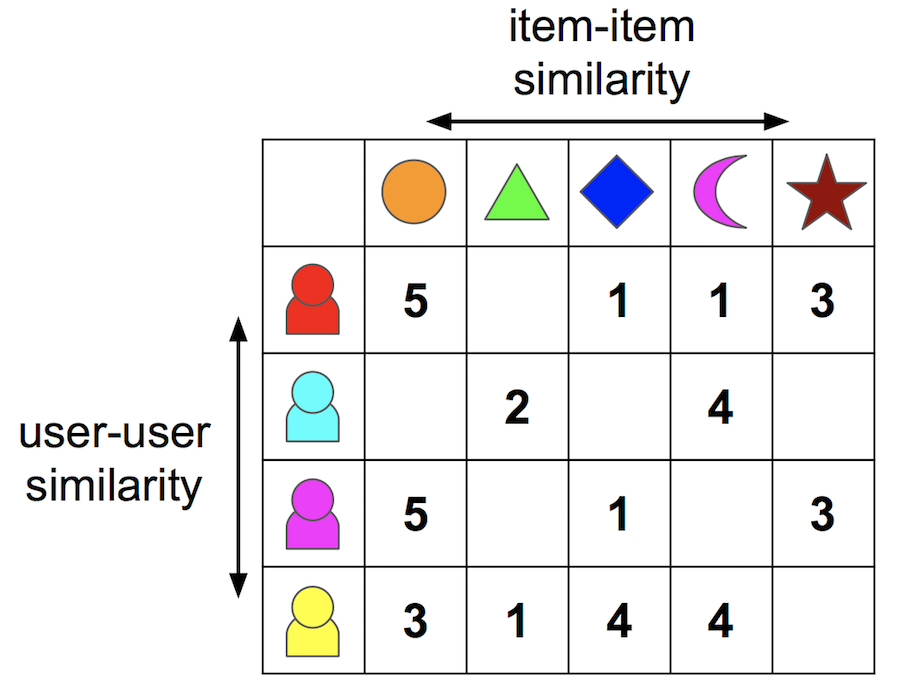

In [2]:
illustration.collaborative

# Import User Rating

In [3]:
df = pd.read_csv("data/collaborative_filtering.csv")
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


In [4]:
df.userId.nunique()

6040

# Training

In [6]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [9]:
data = Dataset.load_from_df(df, Reader())
trainset = data.build_full_trainset()

In [10]:
model = SVD()
model.fit(trainset)

In [13]:
model.predict(1, "My Fair Lady (1964)")

Prediction(uid=1, iid='My Fair Lady (1964)', r_ui=None, est=4.166146324884808, details={'was_impossible': False})

# Prediksi rating untuk film yang belum di tonton

In [14]:
user_id = 1

## Semua film

In [15]:
all_movies = df.movie.unique()
all_movies

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

In [16]:
len(all_movies)

3706

## Yang sudah di tonton user 1

In [17]:
watched = df[df.userId == 1].movie
watched.head()

0    One Flew Over the Cuckoo's Nest (1975)
1          James and the Giant Peach (1996)
2                       My Fair Lady (1964)
3                    Erin Brockovich (2000)
4                      Bug's Life, A (1998)
Name: movie, dtype: object

## Film yang belum di tonton user 1

In [24]:
not_watched = [movie for movie in all_movies if movie not in watched]
len(not_watched)

3706

## Prediksi rating yang belum di tonton

In [32]:
score = [model.predict(user_id, movie).est for movie in not_watched]
score

[4.751743963621713,
 3.3325619386099175,
 4.166146324884808,
 4.291525007339577,
 4.159522429395891,
 4.216826560025008,
 4.426527602361877,
 4.334503091614254,
 4.225151596290784,
 4.478565933972405,
 4.043438035079845,
 3.7532086953983175,
 4.41553674192194,
 4.104952807390989,
 4.291623581143989,
 4.269684433984566,
 3.674347426495583,
 4.434862856408015,
 4.172168597784671,
 4.291537991569087,
 3.7848170737416313,
 4.33167054510527,
 4.200949007723524,
 4.63247538205229,
 3.455822703594033,
 3.6426124195014093,
 4.327170961568502,
 3.6835125224962764,
 4.369917881107408,
 4.305737046681998,
 3.599107702832089,
 3.984104643789972,
 3.909179973204373,
 4.128612800562647,
 4.0561371891497515,
 3.843586480132485,
 3.552360131571502,
 4.43975841709906,
 4.515352501942301,
 4.614772371591141,
 4.671848173577117,
 4.27299297580356,
 4.265630967533253,
 4.090959842470798,
 4.663553400617606,
 4.657865206849539,
 4.454380476116717,
 4.5846732518858255,
 4.677983772815686,
 4.009887274161483

# Membungkus menjadi class

In [ ]:
class ReccomenderSystem:
    def __init__(self, data):
        self.df = pd.read_csv(data)
        self.all_movies = self.df.movie.unique()
        self.model = None


    def fit(self):
        self.data = Dataset.load_from_df(self.df, Reader())
        self.trainset = data.build_full_trainset()
        
        self.model = SVD()
        self.model.fit(trainset)
    
    def reccommend(self, user_id):
        watched = self.df[self.df.userId == user_id].movie
        not_watched = [movie for movie in self.all_movies if movie not in watched]
        score = [self.model.predict(user_id, movie).est for movie in not_watched]
        result = pd.DataFrame({"movie":not_watched,"pred_score":score})
        result.sort_values("pred_score", ascending=False)
        return result
        
    

In [42]:
recsyst = ReccomenderSystem(data="data/collaborative_filtering.csv")
recsyst.fit()

In [43]:
recsyst.reccommend(user_id=2)

,movie,pred_score
23,Schindler's List (1993),4.835395
505,Life Is Beautiful (La Vita � bella) (1997),4.776959
123,Dances with Wolves (1990),4.746734
167,"Shawshank Redemption, The (1994)",4.722583
171,Forrest Gump (1994),4.704242
...,...,...
2852,Digimon: The Movie (2000),1.416971
3032,Barney's Great Adventure (1998),1.416124
2010,"Toxic Avenger, Part II, The (1989)",1.385788
2744,Amityville 3-D (1983),1.332973
